### Iris Classification using Neural Network

ใช้ repo ของ Chaky

### Import

In [46]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 
from torch.utils.data import DataLoader 
import torchvision.datasets as datasets 
import torchvision.transforms as transforms 

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Dataset

In [48]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [49]:
X = df.drop(['species'], axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [77]:
X = np.array(X)
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [51]:
y = df.species
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

### Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Train-Test-Spilt

In [53]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [54]:
X_train = torch.tensor(X_train, dtype=torch.float) # FloatTensor(X_train)
X_test = torch.tensor(X_test, dtype=torch.float)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [55]:
print(X_train.shape)
print(X.shape)

torch.Size([112, 4])
(150, 4)


### Prepare DataLoader
For this analysis we don't need to create a Dataset object, but we should take advantage of PyTorch's DataLoader tool. Even though our dataset is small (120 training samples), we'll load it into our model in two batches. This technique becomes very helpful with large datasets.

In [56]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)
testloader = DataLoader(X_test, batch_size=60, shuffle=False)

### Create Fully Connected Network

In [57]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1) # input layer
        self.fc2 = nn.Linear(h1, h2) # hidden layer 
        self.out = nn.Linear(h2, out_features) # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [58]:
# class NN(nn.Module):
#     def __init__(self, input_size, num_classes):
#         super(NN, self).__init__()
#         self.fc1 = nn.Linear(input_size, 50)
#         self.fc2 = nn.Linear(50, num_classes)
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

In [59]:
torch.manual_seed(32)
model = Model()


In [60]:
# model = NN(784, 10)

In [61]:
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

### Loss

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [63]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

### Set Device

In [64]:
device = ['cuda' if torch.cuda.is_available() else 'cpu']

### Hyperparameters

In [65]:
# input_size = 784
# num_classes = 10 
# learning_rate = 0.001
# batch_size = 64 
epochs = 150
losses = []

### Train

In [66]:
for i in range(epochs):
    i = i + 1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss) 
    
    if i%10 == 1:
        print(f'epoch: {i:2} loss: {loss.item():10.8f}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1 loss: 1.17733824
epoch: 11 loss: 0.96686041
epoch: 21 loss: 0.80840772
epoch: 31 loss: 0.62082511
epoch: 41 loss: 0.42691442
epoch: 51 loss: 0.29033571
epoch: 61 loss: 0.18320985
epoch: 71 loss: 0.12183483
epoch: 81 loss: 0.09511304
epoch: 91 loss: 0.08308463
epoch: 101 loss: 0.07680236
epoch: 111 loss: 0.07304683
epoch: 121 loss: 0.07054677
epoch: 131 loss: 0.06874800
epoch: 141 loss: 0.06737678


### Plot Loss function

In [67]:
losses = [tensor.item() for tensor in losses]

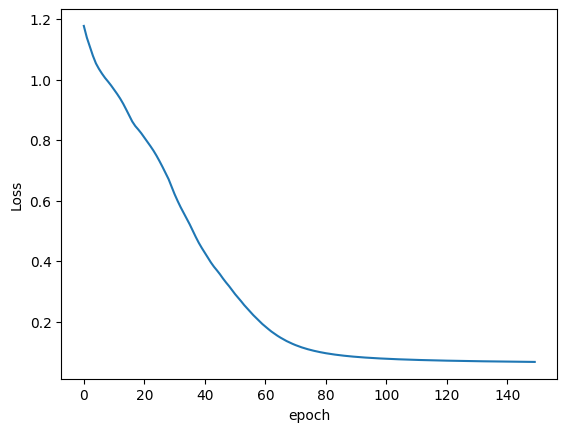

In [69]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

### Evaluate

In [70]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

In [76]:
with torch.no_grad():
    print(model(mystery_iris))
    print()
    print(labels[model(mystery_iris).argmax()])

tensor([  8.2879,   2.8429, -13.3078])

Iris setosa


### Save Model
There are two basic ways to save a model.

The first saves/loads the state_dict (learned parameters) of the model, but not the model class. The syntax follows:                      
Save: torch.save(model.state_dict(), PATH)                    

Load: model = TheModelClass(*args, **kwargs)               
      model.load_state_dict(torch.load(PATH))                  
      model.eval()                   

The second saves the entire model including its class and parameters as a pickle file. Care must be taken if you want to load this into another notebook to make sure all the target data is brought in properly.
Save: torch.save(model, PATH)                

Load: model = torch.load(PATH))                    
      model.eval()                   

In [83]:
# Save model
torch.save(model.state_dict(), 'models/IrisDatasetModel.pt')

In [84]:
# Load model
new_model = Model()
new_model.load_state_dict(torch.load('models/IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)